# Задание 1

In [2]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Считываем данные и формируем dataset с необходимыми столбцами и полями. Выводим для наглядности немного данных.

In [4]:
dataset = pd.read_csv('iris.data',
                      header=None,
                      names=['sepal length', 'sepal width',
                             'petal length', 'petal width', 'class'])
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Задание 1
Постройте  таблицу pairplot для визуального анализ данных

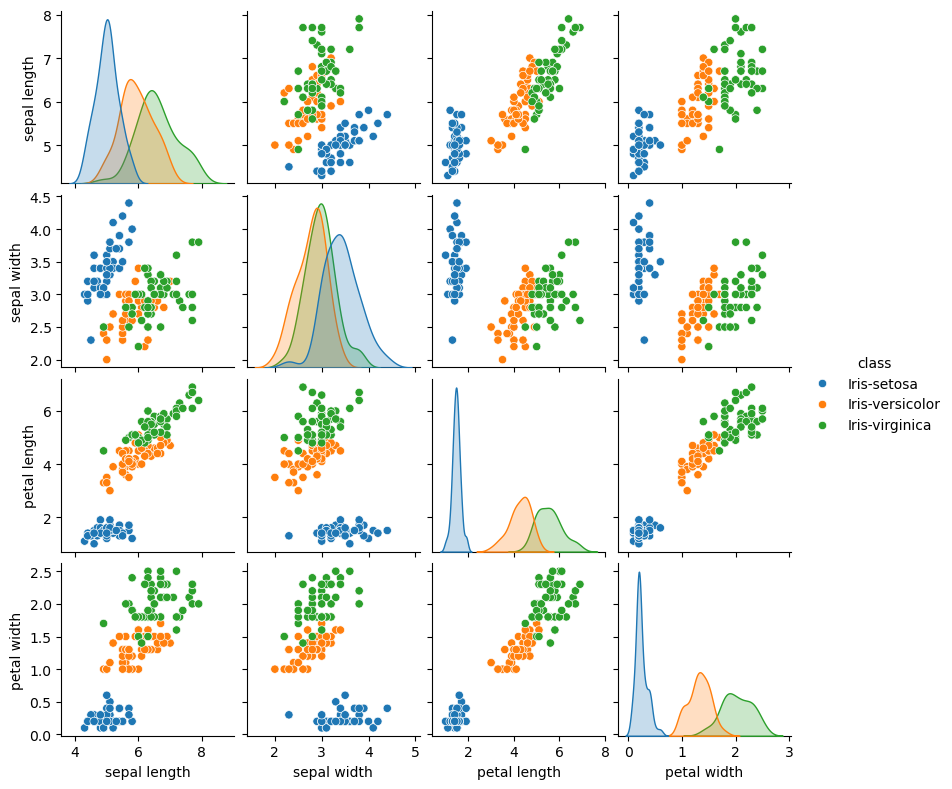

In [6]:
sns.pairplot(dataset, hue='class', height=2)
plt.show()

### Задание 2
Постройте LogisticRegression для бинарной классификации элементов датасета, на примере данных

Для построения бинарной классификации необходимо создать бинарный dataset. Для этого удалим один из трех классов и зададим значения оставшимся 1 или -1.

In [11]:
binary_dataset = dataset.drop(index=dataset.index[dataset['class'] == 'Iris-setosa'])

binary_dataset.loc[dataset['class'] == 'Iris-versicolor', dataset.columns == 'class'] = -1
binary_dataset.loc[dataset['class'] == 'Iris-virginica', dataset.columns == 'class'] = 1

Далее сформируем: матрицу объектов - X и вектор ответов - y

In [13]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'class'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'class'].values.reshape(-1)

Преобразуем

In [15]:
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

Сделаем модель LogisticRegression и обучим

In [17]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

Получаем вектор оптимальных параметров

In [24]:
model.coef_

array([[-3.94857799e-01, -5.12236925e-01,  2.93150207e+00,
         2.41616121e+00, -1.17463494e-03]])

### Задание 3
Покажите переобучение модели линейной регрессии и предложите способ борьбы с ним

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
# Генерация данных
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 3 + np.random.normal(0, 2, 100)  # Линейная зависимость с шумом

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Преобразование X в двумерный массив (требуется для Scikit-learn)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [31]:
# Добавление полиномиальных признаков
poly = PolynomialFeatures(degree=15)  # Высокая степень полинома
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Оценка качества
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Ошибка на обучающей выборке: {train_error}")
print(f"Ошибка на тестовой выборке: {test_error}")

Ошибка на обучающей выборке: 3.0690453579984256
Ошибка на тестовой выборке: 2.8909284645755458


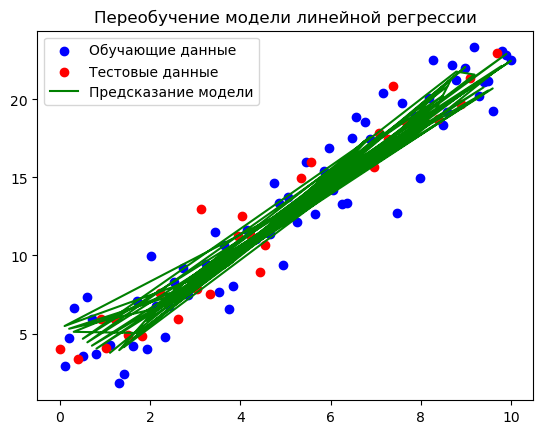

In [33]:
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_train, y_train_pred, color='green', label='Предсказание модели')
plt.legend()
plt.title("Переобучение модели линейной регрессии")
plt.show()

На графике видно, что модель слишком сложная и "колеблется", пытаясь пройти через все точки обучающих данных, что подтверждает переобучение.

Варианты борьбы с переобучением:


1) Уменьшение сложности модели (уменьшаем степень полинома)

In [38]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Предсказание
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Оценка качества
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f"Ошибка на обучающей выборке: {train_error}")
print(f"Ошибка на тестовой выборке: {test_error}")

Ошибка на обучающей выборке: 3.688888226610536
Ошибка на тестовой выборке: 2.2282947891857225


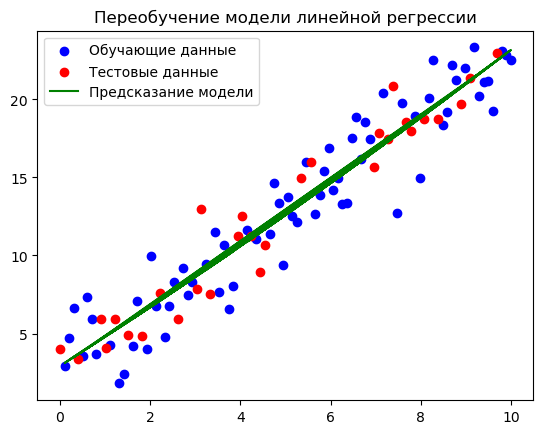

In [40]:
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_train, y_train_pred, color='green', label='Предсказание модели')
plt.legend()
plt.title("Переобучение модели линейной регрессии")
plt.show()

2) Регуляризация

Добавление регуляризации, например, Ridge (L2) или Lasso (L1), чтобы штрафовать модель за слишком большие коэффициенты.

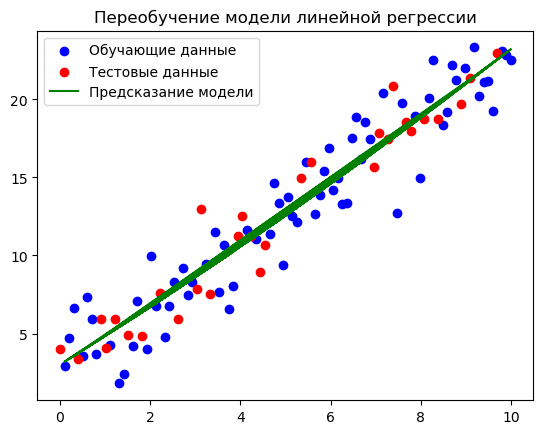

In [43]:
from sklearn.linear_model import Ridge

# Ridge регрессия с регуляризацией
ridge_model = Ridge(alpha=1.0)  # alpha — параметр регуляризации
ridge_model.fit(X_train_poly, y_train)

# Предсказание
y_train_pred = ridge_model.predict(X_train_poly)
y_test_pred = ridge_model.predict(X_test_poly)

plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')
plt.scatter(X_test, y_test, color='red', label='Тестовые данные')
plt.plot(X_train, y_train_pred, color='green', label='Предсказание модели')
plt.legend()
plt.title("Переобучение модели линейной регрессии")
plt.show()

### Задание 4
Обогатите датасет сгенерированными вами данными. Опишите какой способ вы применяли и приложите код генерации данных.

In [46]:
dataset = pd.read_csv('iris.data',
                      header=None,
                      names=['sepal length', 'sepal width',
                             'petal length', 'petal width', 'class'])
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Обоготим данные, используя генерацию данных на основе среднего и стандартного отклонения. Метод - Нормальное расперделение.

In [49]:
def generate_new_data(df, filter, num_samples=10):
    df_filtered = df[df['class'] == filter]
    new_data = {
        'sepal length': np.random.normal(df_filtered['sepal length'].mean(),df_filtered['sepal length'].std(), num_samples),
        'sepal width': np.random.normal(df_filtered['sepal width'].mean(), df_filtered['sepal width'].std(), num_samples),
        'petal length': np.random.normal(df_filtered['petal length'].mean(), df_filtered['petal length'].std(), num_samples),
        'petal width': np.random.normal(df_filtered['petal width'].mean(), df_filtered['petal width'].std(), num_samples),
        'class': [filter] * num_samples
    }
    return pd.DataFrame(new_data)

# Генерация новых данных
new_irics_setos_df = generate_new_data(dataset, "Iris-setosa", num_samples=50)
new_iris_virginica_df = generate_new_data(dataset, "Iris-virginica", num_samples=50)
new_iris_versicolour_df = generate_new_data(dataset, "Iris-versicolor", num_samples=50)

# Объединение исходного и нового датасетов
enriched_df = pd.concat([dataset, new_irics_setos_df, new_iris_virginica_df, new_iris_versicolour_df], ignore_index=True)

enriched_df.tail(100)

,sepal length,sepal width,petal length,petal width,class
200,6.060859,3.074267,4.672044,2.008785,Iris-virginica
201,6.231792,3.449797,5.221208,2.288330,Iris-virginica
202,7.063189,3.250592,5.554894,1.755270,Iris-virginica
203,6.976122,2.922420,5.577928,2.164436,Iris-virginica
204,6.574709,2.967867,5.303611,1.880365,Iris-virginica
...,...,...,...,...,...
295,5.524666,2.609958,4.131844,1.264786,Iris-versicolor
296,6.233868,2.685314,2.992703,1.390494,Iris-versicolor
297,5.831194,2.462866,4.234486,1.078589,Iris-versicolor
298,6.127575,2.630582,4.151481,1.508729,Iris-versicolor


Второй пример обогащения с помощью SMOTE. Он особенно полезен для несбалансированных датасетов, где один класс значительно меньше другого.

### Задание 5
Поэкспериментируйте с возможными AutoML моделями для усовершенствования эталонного решения.

### AutoML H2O

In [54]:
import h2o
from h2o.automl import H2OAutoML

# Инициализация H2O
h2o.init()

# Загрузка данных
data = h2o.import_file("iris.data")  # Замените на путь к вашему файлу
# Разделение данных на train и test
train, test = data.split_frame(ratios=[0.8], seed=42)

# Указание целевой переменной и признаков
y = "C5"  # Замените на имя целевой переменной
x = data.columns
x.remove(y)

# Запуск AutoML
aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=300)
aml.train(x=x, y=y, training_frame=train)

# Просмотр результатов
lb = aml.leaderboard
print(lb)

# Предсказание на тестовых данных
preds = aml.leader.predict(test)
print(preds)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 21.0.5+-13047016-b750.29, mixed mode)
  Starting server from C:\Users\dvm10\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\dvm10\AppData\Local\Temp\tmplffp4g5d
  JVM stdout: C:\Users\dvm10\AppData\Local\Temp\tmplffp4g5d\h2o_dvm10_started_from_python.out
  JVM stderr: C:\Users\dvm10\AppData\Local\Temp\tmplffp4g5d\h2o_dvm10_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,5 months and 17 days
H2O_cluster_name:,H2O_from_python_dvm10_rrc63o
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.932 Gb
H2O_cluster_total_cores:,20
H2O_cluster_allowed_cores:,20
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:11:43.365: AutoML: XGBoost is not available; skipping it.


15:11:44.5: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 121.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                   mean_per_class_error    logloss      rmse        mse
GLM_1_AutoML_1_20250419_151143                                        0.0337607  0.0658835  0.144692  0.0209358
DeepLearning_grid_1_AutoML_1_20250419_151143_model_1                  0.0504274  0.118001   0.198106  0.0392458
GBM_grid_1_AutoML_1_20250419_151143_model_1                           0.050641   0.150907   0.205933  0.0424083
DRF_1_AutoML_1_20250419_151143                                        0.050641   0.142554   0.187482  0.0351496
GBM_4_AutoML_1_20250419_151143    

### AutoML TPOT

In [56]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

df = pd.read_csv('iris.data',
                      header=None,
                      names=['sepal length', 'sepal width',
                             'petal length', 'petal width', 'class'])
df.sample(5, random_state=0)

# Загрузка данных
X = df.drop('class', axis=1)
y = df['class']

# Разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение TPOT
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, tpot.predict(X_test)))

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Accuracy: 1.0
